Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 fe

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


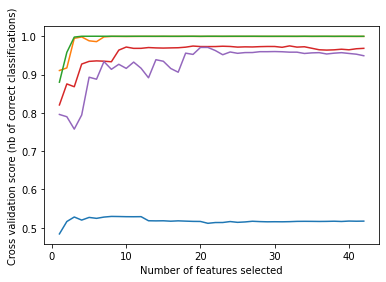

In [1]:

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE


df = pd.read_excel('df_total_raw.xlsx', na_values=['-OVER','+OVER'])
df.drop(['Series_Date','Series_Time','center_MAX','outside temp_MAX','filename','Date_Time','Type','Type_num'], axis=1, inplace=True)
df.interpolate(inplace=True)

X = df.drop(['Heat_ON'],axis=1)
y = df['Heat_ON']


# lightgbm classifier 선택
lgbmclf = LGBMClassifier(random_state=0, n_estimators=200, learning_rate=0.05)
# REFCV로 Feature들을 반복적으로 제거해가면서 학습/평가 수행
rfecv = RFECV(estimator=lgbmclf, step=1, cv=StratifiedKFold(5),
              scoring='accuracy', verbose=2)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [2]:
rfecv.support_

array([ True, False,  True, False, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True,  True, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False, False,  True, False, False, False])

In [3]:
X.columns[rfecv.support_]


Index(['T1_lp1_MIN', 'T2_hp1_MIN', 'T1_comp in_MIN', 'T1_comp in_MAX',
       'T2_comp out_MIN', 'T2_comp out_MAX', 'T3_cond in_MIN',
       'T3_cond in_MAX', 'T4_cond out_MAX', 'T5_Exp in_MIN', 'T5_Exp in_MAX',
       'T6_Exp out_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN',
       'T10_sol out_MIN', 'inside temp_MIN', 'center_MIN',
       'eva air out temp_MIN', 'eva air out temp_MAX', 'T8_1-T7_MIN'],
      dtype='object')

In [4]:
X_transformed = rfecv.transform(X)
X_transformed

array([[ 3.43,  7.22, 19.2 , ..., 19.3 , 19.5 , -1.3 ],
       [ 3.3 ,  7.43, 16.8 , ..., 19.  , 19.3 , -0.9 ],
       [ 3.2 ,  7.72, 15.2 , ..., 18.6 , 19.  , -1.1 ],
       ...,
       [ 1.19,  7.18,  6.3 , ...,  3.8 , 25.9 ,  2.7 ],
       [ 1.07,  7.11,  7.8 , ...,  3.7 , 26.  ,  4.3 ],
       [ 1.05,  7.04,  8.8 , ...,  3.7 , 26.  ,  6.4 ]])

In [5]:
X_transformed.shape

(129100, 20)